# Exploratory Data Analysis

In this EDA, i am going to cover several question below:
1. Which Months generate the highest Order and Revenue?
2. Which Day of a week generate the highest Order and Revenue?
3. Which hour the most Order are made?
4. Which Date contributes the highest revenue?
5. How does each country contributes to the revenue? is there any patterns?
6. How does the Discount influence the business performance?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("E-commerce_data_clean.csv")
data.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34


## 1. Which Months generate the highest Order and Revenue?

In [3]:
print("This dataset contain information from {} to {}".format(data['Date'].unique()[0], data['Date'].unique()[-1]))

This dataset contain information from 2010-12-01 to 2011-12-09


In [4]:
ord_rev_month = pd.DataFrame({'Order': data.groupby('InvoiceNo')['Months'].unique().value_counts().sort_index(), 
                              'Revenue' : data.groupby('Months')['TotalCost'].sum()})
ord_rev_month

,Order,Revenue
[1],1236,475074.380
[2],1202,436546.150
[3],1619,579964.610
[4],1384,426047.851
[5],1849,648251.080
[6],1707,608013.160
[7],1593,574238.481
[8],1544,616368.000
[9],2078,931440.372
[10],2263,974603.590


In [5]:
ord_rev_month.corr()

,Order,Revenue
Order,1.000000,0.946853
Revenue,0.946853,1.000000


## 2. Which Day of a week generate the highest Order and Revenue?

In [6]:
data['Days'].describe()

count    406829.000000
mean          3.606402
std           1.921907
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           7.000000
Name: Days, dtype: float64

In [7]:
ord_rev_day = pd.DataFrame({'Order': data.groupby('InvoiceNo')['Days'].unique().value_counts().sort_index(), 
                              'Revenue' : data.groupby('Days')['TotalCost'].sum()})
ord_rev_day

,Order,Revenue
[1],3512,1274551.511
[2],3892,1563193.591
[3],4110,1530477.490
[4],4978,1906108.190
[5],3356,1241316.181
[7],2342,784418.851


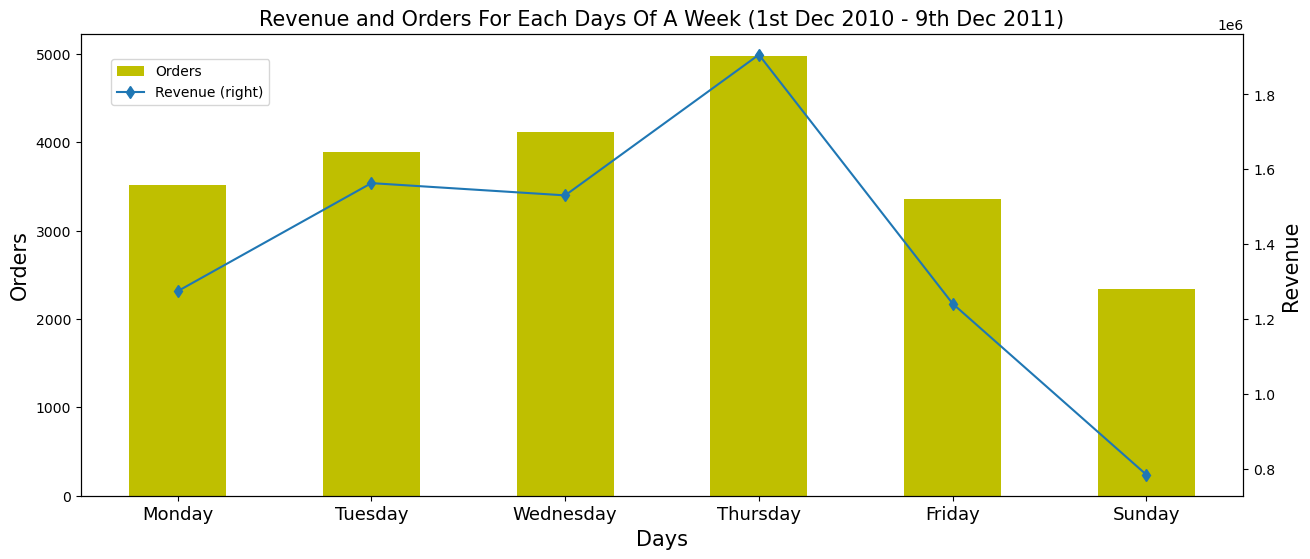

In [8]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_day['Order'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_day['Revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')
ax1.set_xlabel('Days',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders For Each Days Of A Week (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax1.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Sunday'), 
                    rotation='horizontal', fontsize=13)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

### 2.1 Where is Saturday?

In [9]:
data[data['Days'] == 6].count()

InvoiceNo      0
InvoiceDate    0
Date           0
Years          0
Months         0
Days           0
Hours          0
DayOfMonth     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
TotalCost      0
dtype: int64

### 2.2 Why does Sunday has the lowest order and revenue and Thurday has the highest one?

In [10]:
print("Working hours on Thurday : 0{}0 - {}0 ({} Hours)".format(data[(data['Days']==4)]['Hours'].describe()['min'], 
                                                                data[(data['Days']==4)]['Hours'].describe()['max'], 
                                                                int(data[(data['Days']==4)]['Hours'].describe()['max'] -
                                                                data[(data['Days']==4)]['Hours'].describe()['min'])))
print("Working hours on Sunday : 0{}0 - {}0 ({} Hours)".format(data[(data['Days']==7)]['Hours'].describe()['min'], 
                                                               data[(data['Days']==7)]['Hours'].describe()['max'], 
                                                               int(data[(data['Days']==7)]['Hours'].describe()['max'] -
                                                               data[(data['Days']==7)]['Hours'].describe()['min'])))

Working hours on Thurday : 06.00 - 20.00 (14 Hours)
Working hours on Sunday : 09.00 - 16.00 (7 Hours)


## 3. Which hour the most Order are made?

In [11]:
data['Hours'].describe()

count    406829.000000
mean         12.737472
std           2.284952
min           6.000000
25%          11.000000
50%          13.000000
75%          14.000000
max          20.000000
Name: Hours, dtype: float64

In [12]:
ord_rev_hour = pd.DataFrame({'Order': data.groupby('InvoiceNo')['Hours'].unique().value_counts()[:-1].sort_index(), 
                             'Revenue' : data.groupby('Hours')['TotalCost'].sum()})
ord_rev_hour

,Order,Revenue
[6],22,-497.350
[7],31,31009.320
[8],608,280103.270
[9],1622,655114.831
[10],2613,1150556.961
[11],2769,1054638.910
[12],3596,1337091.770
[13],3043,1122675.430
[14],2645,948603.821
[15],2405,898958.860


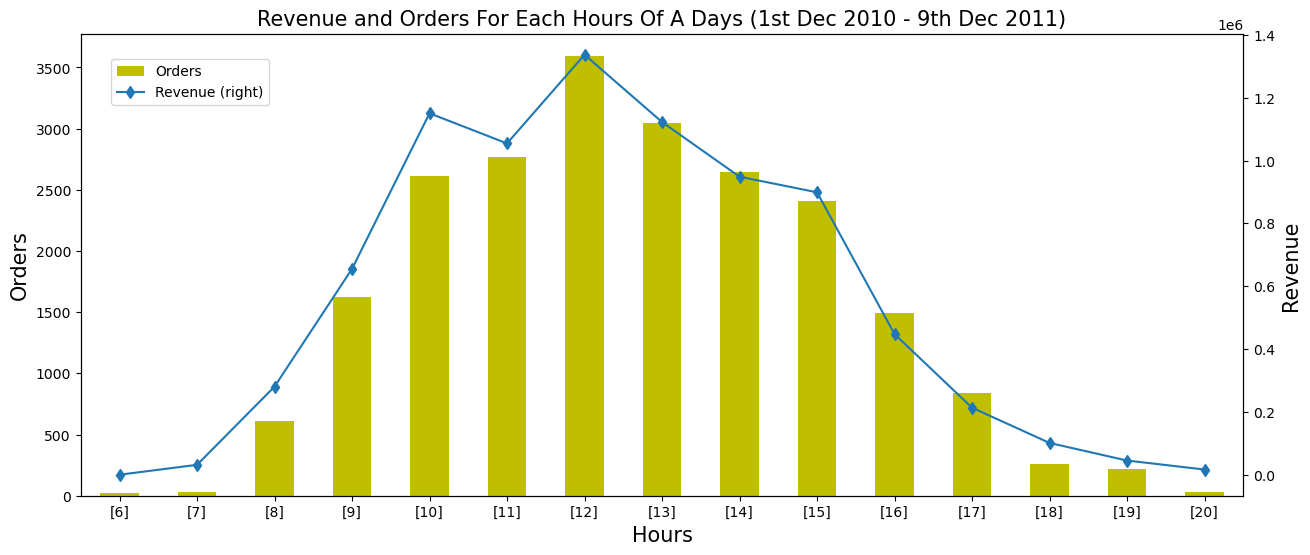

In [13]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_hour['Order'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_hour['Revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')
ax1.set_xlabel('Hours',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders For Each Hours Of A Days (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

**Business Insights**

According to the Visualization above, it is shown that the most order are made around 10 am - 3 pm. It also shows us that there is a significant differences from the highest order hour compare to the lowest one. From this Facts, we could give business insights as belows :
1. Optimize the advertisements around 10 am - 3 pm. Because it is the time that most customers will see.
2. Optimize the Discounts or Promos around 6-9 am or 4-8 pm since the order made at this hours is very low. 

By doing this, we could maximize our sales and revenue by optimizing our Advertisements and Promos.

## 4.  Which Date contributes the highest revenue?

In [14]:
data['DayOfMonth'].describe()

count    406829.000000
mean         15.036128
std           8.653730
min           1.000000
25%           7.000000
50%          15.000000
75%          22.000000
max          31.000000
Name: DayOfMonth, dtype: float64

In [15]:
ord_rev_date = pd.DataFrame({'Order': data.groupby('InvoiceNo')['DayOfMonth'].unique().value_counts().sort_index(), 
                             'Revenue' : data.groupby('DayOfMonth')['TotalCost'].sum()})
ord_rev_date

,Order,Revenue
[1],849,281100.250
[2],745,252279.920
[3],612,263596.020
[4],744,311271.950
[5],820,347762.090
[6],991,321291.450
[7],913,368872.920
[8],910,286675.930
[9],776,283259.390
[10],800,272696.740


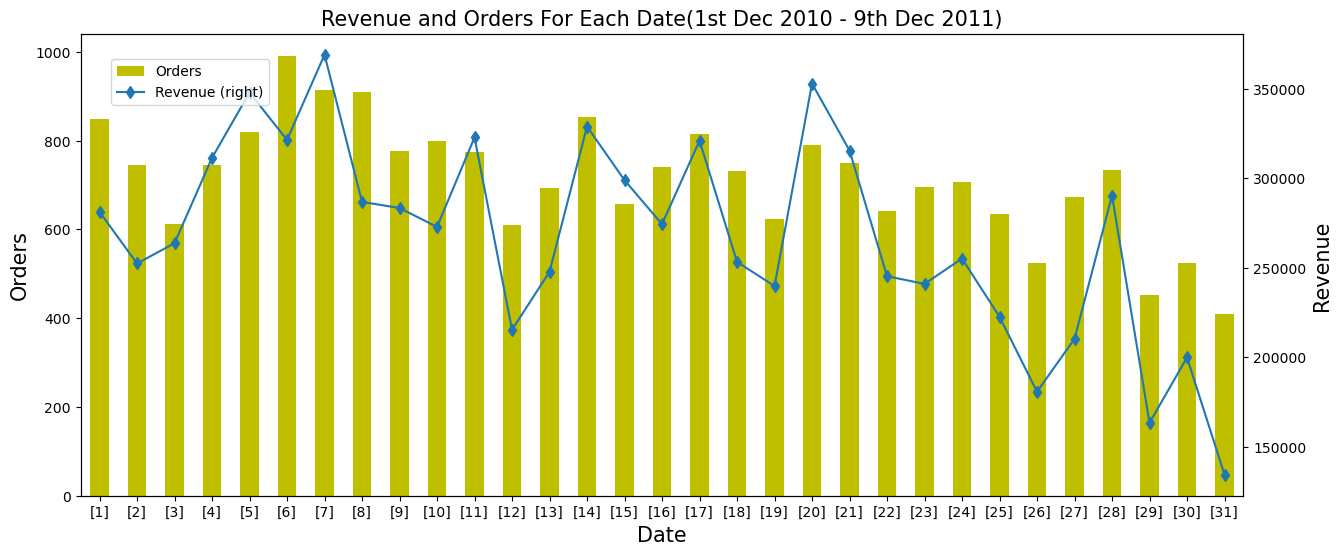

In [16]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_date['Order'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_date['Revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')
ax1.set_xlabel('Date',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders For Each Date(1st Dec 2010 - 9th Dec 2011)',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

## 5. How does each country contributes to the revenue? is there any patterns?

In [17]:
print("Number of Country that the sales cover : ", data['Country'].nunique())
print("List of country : ")
n = 1
for i in data['Country'].unique():
    print("{}. {}".format(n, i))
    n += 1

Number of Country that the sales cover :  37
List of country : 
1. United Kingdom
2. France
3. Australia
4. Netherlands
5. Germany
6. Norway
7. EIRE
8. Switzerland
9. Spain
10. Poland
11. Portugal
12. Italy
13. Belgium
14. Lithuania
15. Japan
16. Iceland
17. Channel Islands
18. Denmark
19. Cyprus
20. Sweden
21. Austria
22. Israel
23. Finland
24. Greece
25. Singapore
26. Lebanon
27. United Arab Emirates
28. Saudi Arabia
29. Czech Republic
30. Canada
31. Unspecified
32. Brazil
33. USA
34. European Community
35. Bahrain
36. Malta
37. RSA


In [18]:
country_perform = pd.DataFrame({'Order': data.groupby('InvoiceNo')['Country'].unique().value_counts().sort_index(), 
                               'Revenue': data.groupby('Country')['TotalCost'].sum()})
country_perform.sort_values(by='Order', ascending=False).head()

,Order,Revenue
[United Kingdom],19857,6767873.394
[Germany],603,221698.210
[France],458,196712.840
[EIRE],319,250285.220
[Belgium],119,40910.960


In [27]:
#Import plotly.express libraries for visualization
import plotly.express as px

# total bookings per market segment (incl. canceled)
segments=country_perform["Revenue"]

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=country_perform.index,
             title="Country Performance by Revenue",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [28]:
country_perform['Percentage'] = (country_perform['Revenue']/country_perform['Revenue'].sum())*100
country_perform.sort_values(by='Percentage', ascending=False).head(10)

,Order,Revenue,Percentage
[United Kingdom],19857,6767873.394,81.539997
[Netherlands],101,284661.540,3.429630
[EIRE],319,250285.220,3.015461
[Germany],603,221698.210,2.671042
[France],458,196712.840,2.370015
[Australia],69,137077.270,1.651520
[Switzerland],71,55739.400,0.671554
[Spain],105,54774.580,0.659929
[Belgium],119,40910.960,0.492899
[Sweden],46,36595.910,0.440911


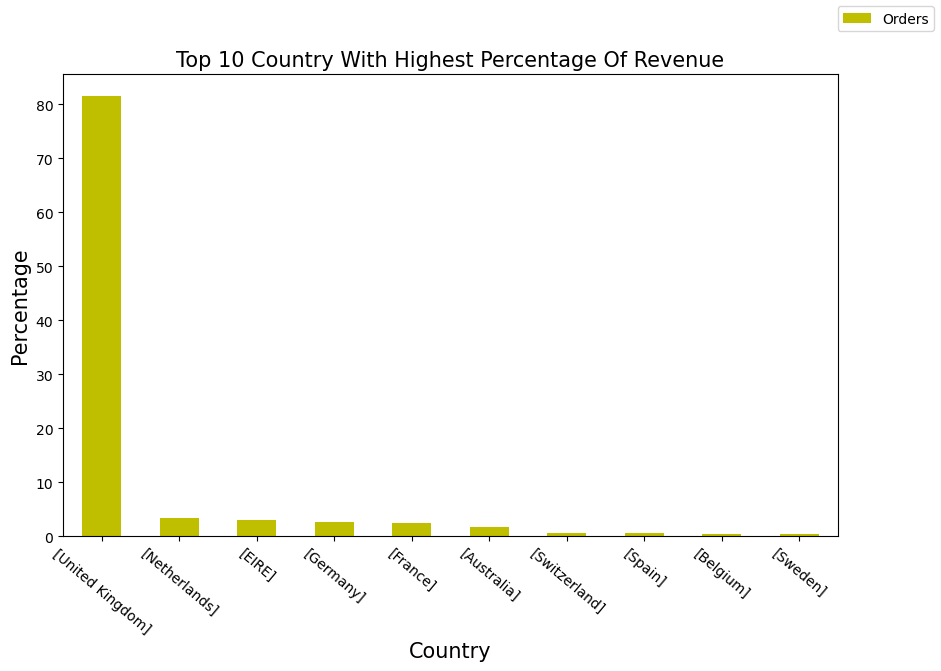

In [29]:
top_ten = country_perform.sort_values(by='Percentage', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))
top_ten['Percentage'].plot(kind='bar', color='y', label='Orders')
ax1.set_ylabel('Percentage',fontsize=15)
ax1.set_xlabel('Country',fontsize=15)
plt.xticks(rotation=(365-45))
ax1.set_title('Top 10 Country With Highest Percentage Of Revenue',fontsize=15)
fig.legend(loc="upper right", bbox_transform=ax1.transAxes)
plt.show()

## 6. How does the Discounts influence the business performance?

In [30]:
months = ['january', 'february', 'march', 'april', 'may', 'june', 
          'july', 'august', 'september', 'october', 'november', 'desember']

mon_rev = []
disc_count = []

for i in range(1,13):
    mon_rev.append(data[data['Months'] == i]['TotalCost'].sum())
    disc_count.append(data[(data['StockCode']=='D') &(data['Months'] == i)]['StockCode'].count())
    
disc_rev = pd.DataFrame({'monthly_revenue': mon_rev, 'num_of_disc': disc_count}, index=months)
disc_rev

,monthly_revenue,num_of_disc
january,475074.380,1
february,436546.150,4
march,579964.610,5
april,426047.851,3
may,648251.080,7
june,608013.160,7
july,574238.481,5
august,616368.000,14
september,931440.372,7
october,974603.590,3


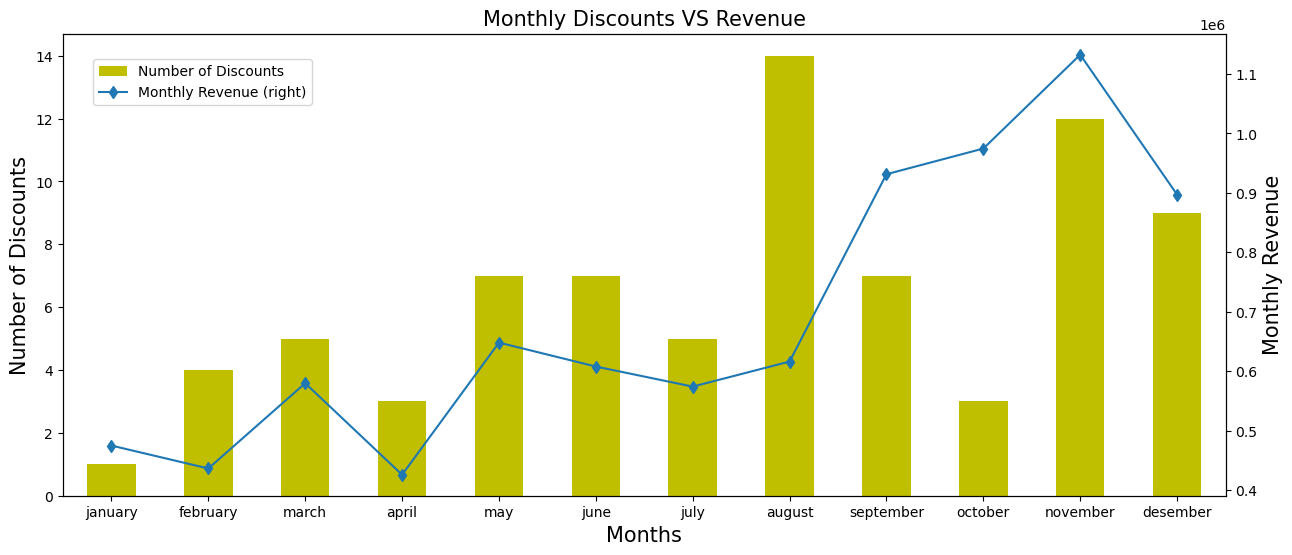

In [31]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_rev['num_of_disc'].plot(kind='bar', color='y', label='Number of Discounts')
ax2 = disc_rev['monthly_revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Monthly Revenue')
ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('Number of Discounts',fontsize=15)
ax2.set_ylabel('Monthly Revenue',fontsize=15)
ax1.set_title('Monthly Discounts VS Revenue',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

In [32]:
disc_rev.corr(method='spearman')

,monthly_revenue,num_of_disc
monthly_revenue,1.000000,0.576004
num_of_disc,0.576004,1.000000


<Figure size 600x600 with 0 Axes>

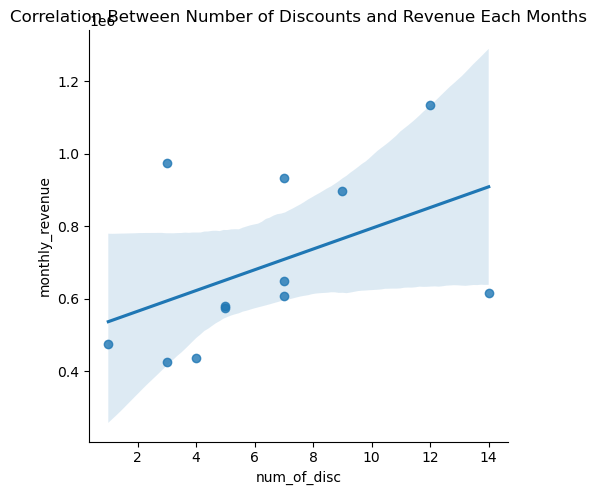

In [33]:
plt.figure(figsize=(6,6))
sns.lmplot(data = disc_rev, x = 'num_of_disc', y = 'monthly_revenue')
plt.title('Correlation Between Number of Discounts and Revenue Each Months')
plt.show()

In [34]:
disc_rev.insert(loc=2, column='num_of_order', 
                value=pd.Series(data.groupby('InvoiceNo')['Months'].unique().value_counts().sort_index()).values)
disc_rev

,monthly_revenue,num_of_disc,num_of_order
january,475074.380,1,1236
february,436546.150,4,1202
march,579964.610,5,1619
april,426047.851,3,1384
may,648251.080,7,1849
june,608013.160,7,1707
july,574238.481,5,1593
august,616368.000,14,1544
september,931440.372,7,2078
october,974603.590,3,2263


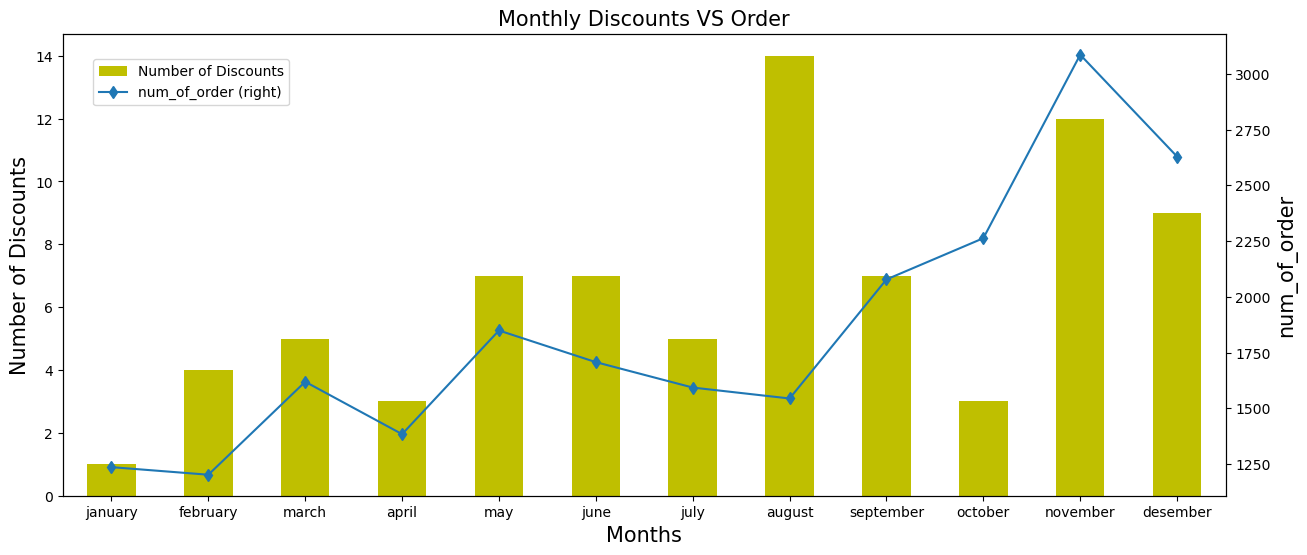

In [35]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_rev['num_of_disc'].plot(kind='bar', color='y', label='Number of Discounts')
ax2 = disc_rev['num_of_order'].plot(kind='line', marker='d', secondary_y=True, label = 'num_of_order')
ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('Number of Discounts',fontsize=15)
ax2.set_ylabel('num_of_order',fontsize=15)
ax1.set_title('Monthly Discounts VS Order',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

<Figure size 600x600 with 0 Axes>

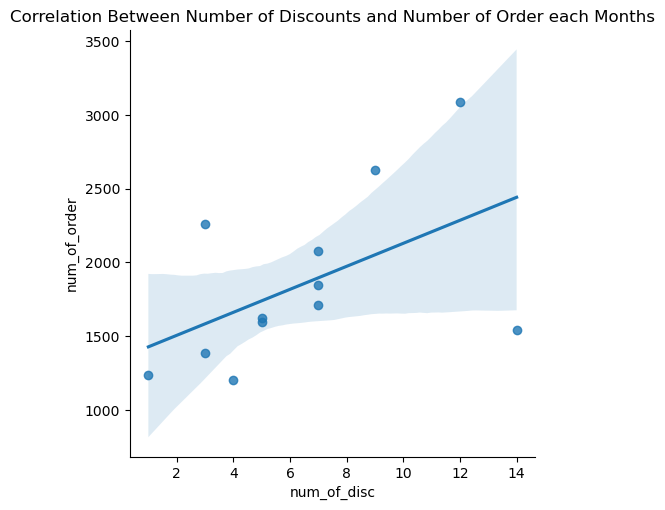

In [36]:
plt.figure(figsize=(6,6))
sns.lmplot(data = disc_rev, x = 'num_of_disc', y = 'num_of_order')
plt.title('Correlation Between Number of Discounts and Number of Order each Months')
plt.show()

<AxesSubplot:>

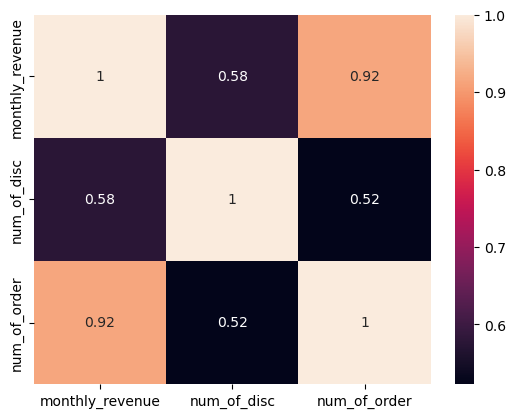

In [37]:
sns.heatmap(disc_rev.corr(method='spearman'), annot=True)

In [38]:
disc_rev.corr(method='spearman')

,monthly_revenue,num_of_disc,num_of_order
monthly_revenue,1.000000,0.576004,0.916084
num_of_disc,0.576004,1.000000,0.522998
num_of_order,0.916084,0.522998,1.000000
